In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('all_seasons_working.csv')

DATA CLEANING AND DEALING WITH OUTLIERS

In [3]:
# changing 'draft number' column from object type to int type 
df.draft_number = pd.to_numeric(df.draft_number, errors='coerce').fillna(0).astype(np.int64)
# # group by name
mean_val_players = df.groupby('player_name').mean()
# dropping players with draft number not in range(1, 61) (we want to base on new form of draft where 
# max draft number is 60)
drafted_players_grouped = mean_val_players[(mean_val_players['draft_number'] > 0) & (mean_val_players['draft_number'] < 61)] 
# choosing only players that have played decent amount of games during their careers (avg half a season 
# games played every year) and also choosing players that avg more than 4pts per game in a season 
# - this is due to lack of a column 'minutes played'. I want to avoid a situation where a player with 
# a lot of games played, was only 0-10 min on a court every game and his stats are lowered due to that. 
drafted_players_grouped = drafted_players_grouped[(drafted_players_grouped['gp'] > 41) & (drafted_players_grouped['pts'] > 4)]
drafted_players_grouped

,Unnamed: 0,age,player_height,player_weight,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
player_name,,,,,,,,,,,,,,,
A.C. Green,1114.400000,35.000000,205.740000,102.058200,23.0,75.800000,5.780000,6.060000,0.860000,-1.880000,0.093000,0.186400,0.127400,0.486800,0.054000
AJ Price,7113.833333,25.500000,187.960000,84.821704,52.0,43.500000,5.350000,1.333333,2.000000,-2.233333,0.017667,0.090833,0.210667,0.476500,0.248833
Aaron Brooks,7535.500000,28.100000,182.880000,73.028312,26.0,64.500000,8.880000,1.550000,2.760000,-3.310000,0.022700,0.069700,0.222200,0.521000,0.230700
Aaron Gordon,9931.857143,22.000000,205.014286,101.734206,4.0,64.714286,12.500000,6.271429,2.442857,-1.328571,0.057571,0.172714,0.198143,0.531286,0.124429
Aaron Holiday,10823.333333,23.000000,183.726667,83.914520,23.0,60.666667,7.533333,1.666667,2.333333,3.000000,0.011000,0.075000,0.192333,0.514000,0.169000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zarko Cabarkapa,3730.000000,24.000000,210.820000,104.326160,17.0,50.000000,4.466667,2.133333,0.566667,-6.333333,0.071000,0.167667,0.218000,0.504000,0.094000
Zaza Pachulia,6762.375000,27.500000,210.820000,123.036830,42.0,68.625000,6.700000,5.743750,1.318750,0.350000,0.121500,0.206875,0.166312,0.540312,0.097812
Zeljko Rebraca,3239.200000,32.000000,213.360000,118.024638,54.0,43.000000,5.560000,2.960000,0.360000,-2.760000,0.074400,0.168600,0.184000,0.577200,0.044000


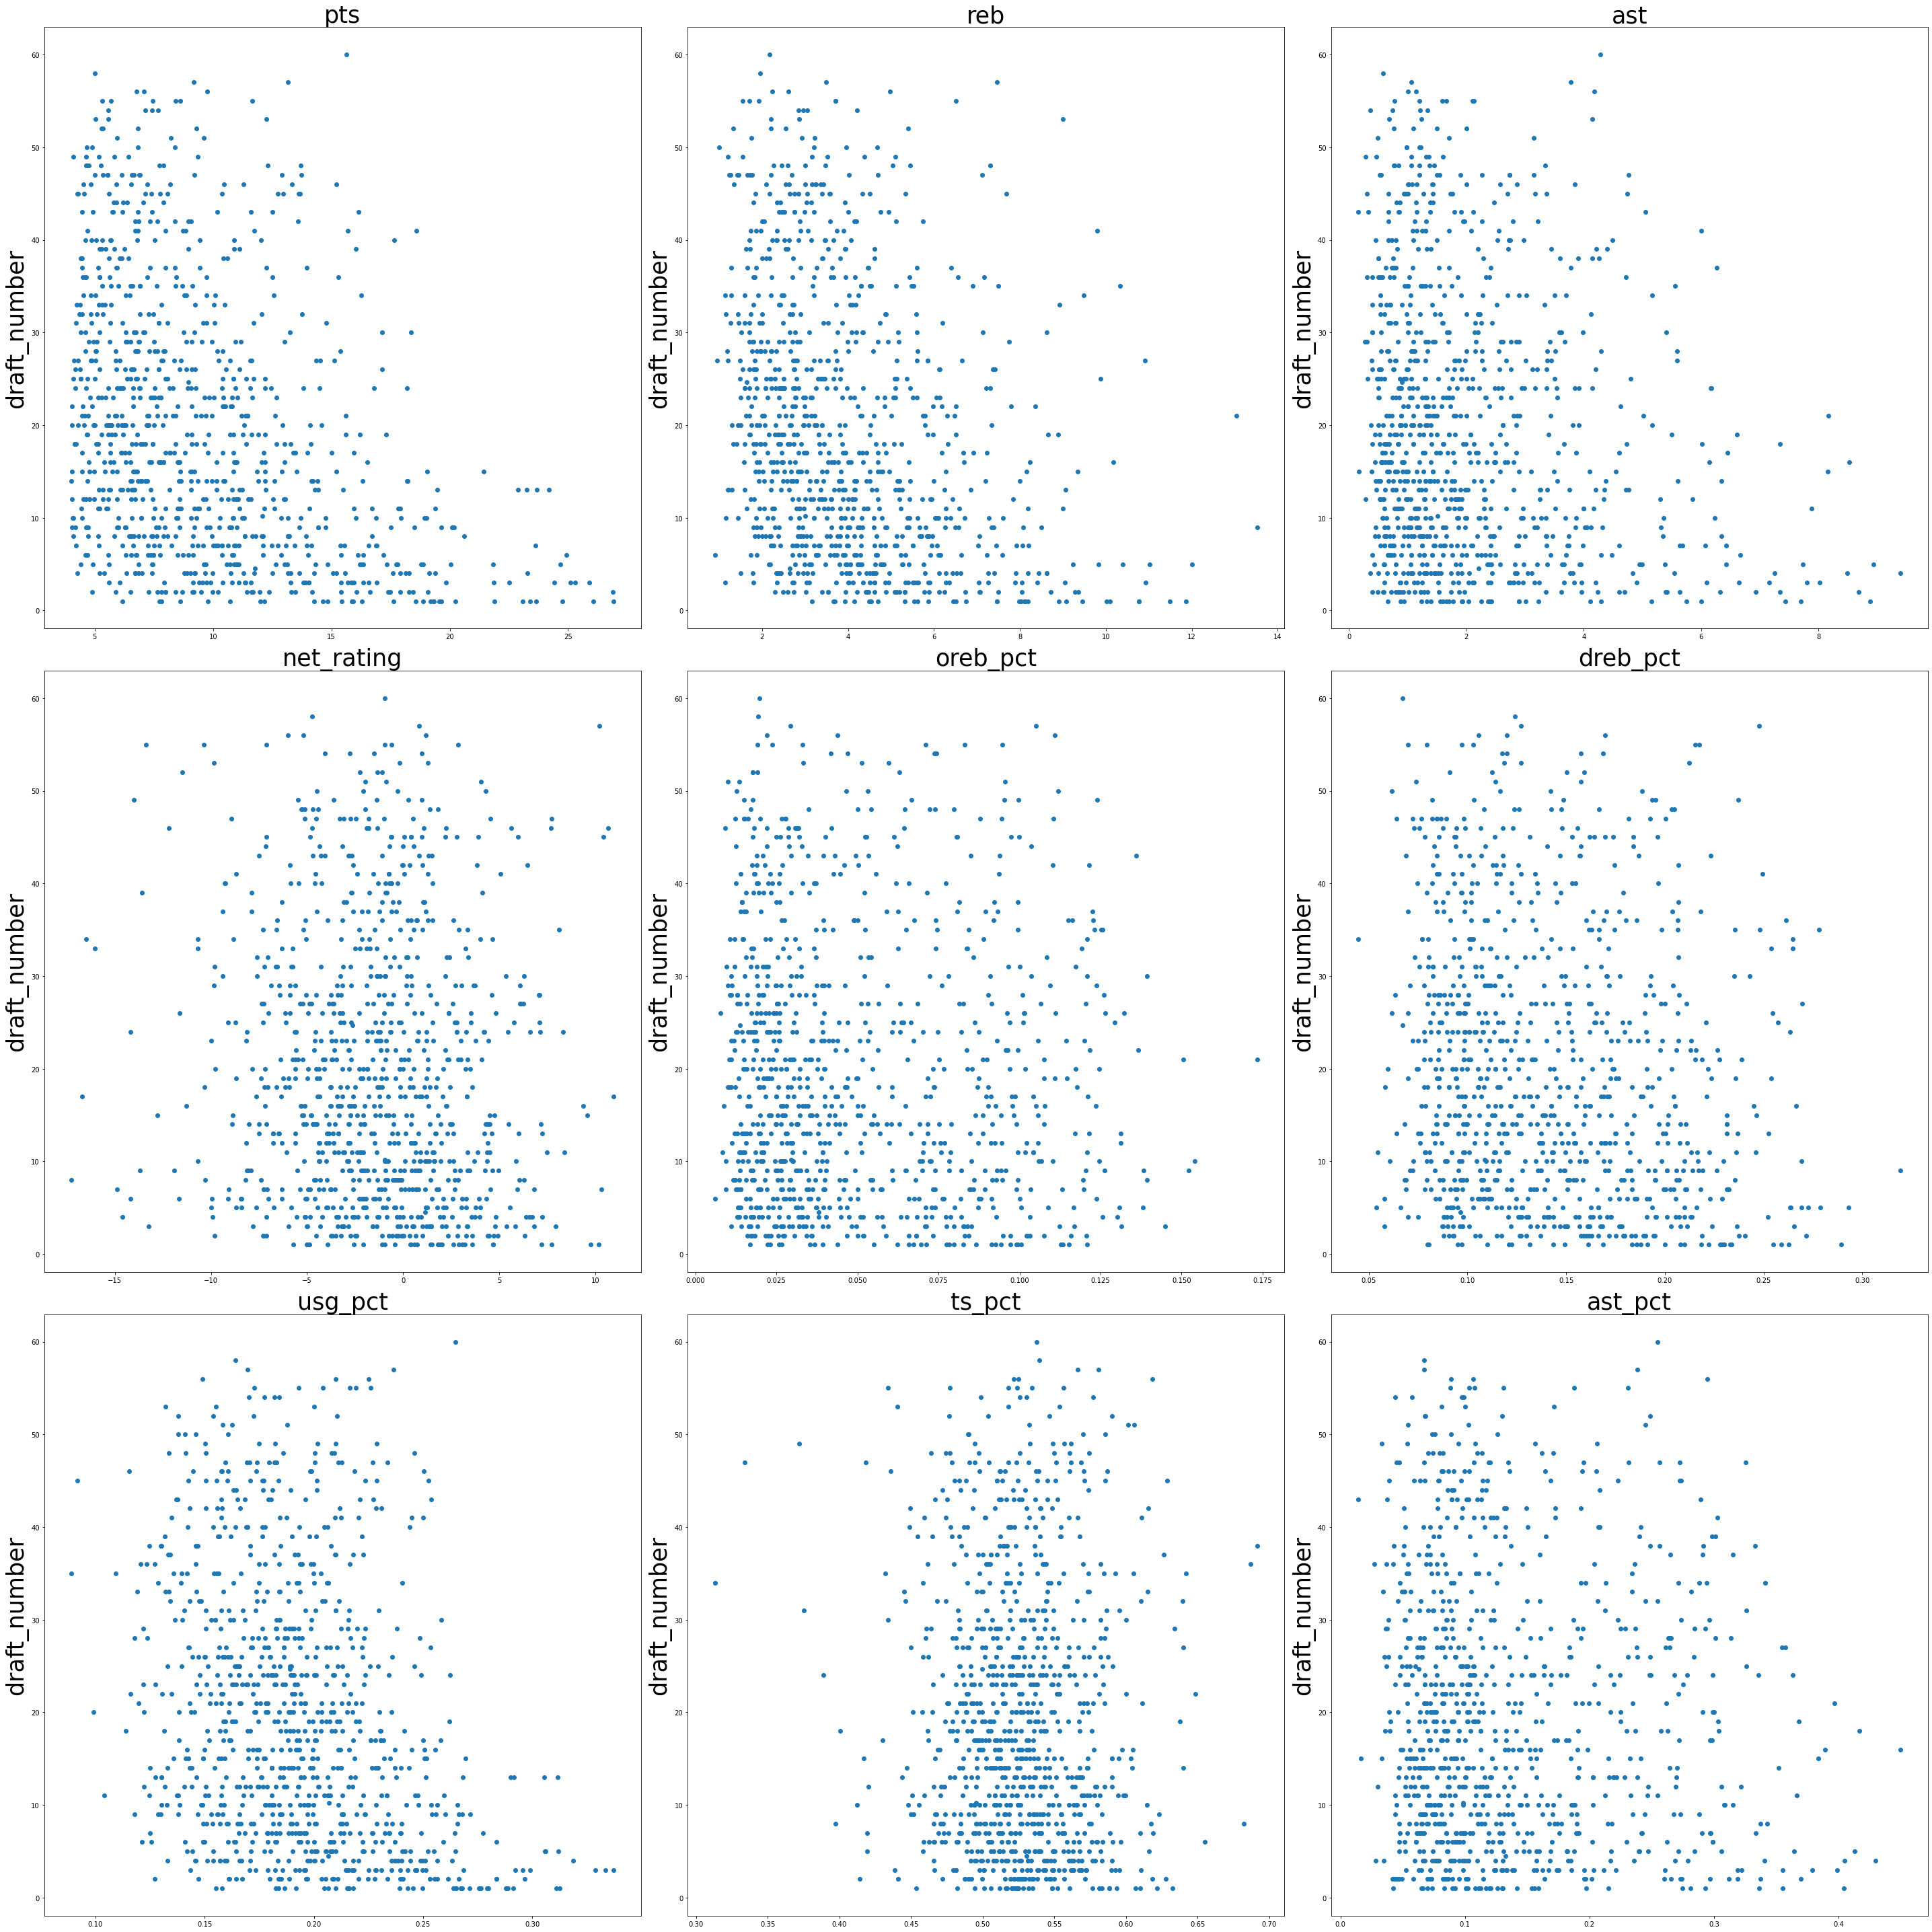

In [4]:
fig,axes = plt.subplots(nrows=3,ncols=3,figsize=(40,40))

axes[0, 0].plot(drafted_players_grouped['pts'],drafted_players_grouped['draft_number'],'o')
axes[0, 0].set_title("pts", fontsize=35)
axes[0, 0].set_ylabel("draft_number", fontsize=35)

axes[0,1].plot(drafted_players_grouped['reb'],drafted_players_grouped['draft_number'],'o')
axes[0,1].set_title("reb", fontsize=35)
axes[0,1].set_ylabel('draft_number', fontsize=35)

axes[0,2].plot(drafted_players_grouped['ast'],drafted_players_grouped['draft_number'],'o')
axes[0,2].set_title("ast", fontsize=35);
axes[0,2].set_ylabel('draft_number', fontsize=35)

axes[1,0].plot(drafted_players_grouped['net_rating'],drafted_players_grouped['draft_number'],'o')
axes[1,0].set_title("net_rating", fontsize=35);
axes[1,0].set_ylabel('draft_number', fontsize=35)

axes[1,1].plot(drafted_players_grouped['oreb_pct'],drafted_players_grouped['draft_number'],'o')
axes[1,1].set_title("oreb_pct", fontsize=35);
axes[1,1].set_ylabel('draft_number', fontsize=35)

axes[1,2].plot(drafted_players_grouped['dreb_pct'],drafted_players_grouped['draft_number'],'o')
axes[1,2].set_title("dreb_pct", fontsize=35);
axes[1,2].set_ylabel('draft_number', fontsize=35)

axes[2,0].plot(drafted_players_grouped['usg_pct'],drafted_players_grouped['draft_number'],'o')
axes[2,0].set_title("usg_pct", fontsize=35);
axes[2,0].set_ylabel('draft_number', fontsize=35)

axes[2,1].plot(drafted_players_grouped['ts_pct'],drafted_players_grouped['draft_number'],'o')
axes[2,1].set_title("ts_pct", fontsize=35);
axes[2,1].set_ylabel('draft_number', fontsize=35)

axes[2,2].plot(drafted_players_grouped['ast_pct'],drafted_players_grouped['draft_number'],'o')
axes[2,2].set_title("ast_pct", fontsize=35);
axes[2,2].set_ylabel('draft_number', fontsize=35)

plt.tight_layout();

LINEAR REGRESSION IMPLEMENTATION

In [5]:
# separate into features and labels so we will create 2 matrixes
# features - remaining columns that are not your label column
X = drafted_players_grouped.drop(columns=['draft_number', 'age', 'gp', 'Unnamed: 0', 'player_height',
                                          'player_weight'], axis=1)
print(X)
# label column
y = drafted_players_grouped['draft_number']
print(y)

from sklearn.model_selection import train_test_split

# separates the features (x) and later labels (y) - do not change the order of unpacking
# test size - what percentage of data should go to the test set (around 30 percent)
# random_state - controls the shuffling of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

                          pts       reb       ast  net_rating  oreb_pct  \
player_name                                                               
A.C. Green           5.780000  6.060000  0.860000   -1.880000  0.093000   
AJ Price             5.350000  1.333333  2.000000   -2.233333  0.017667   
Aaron Brooks         8.880000  1.550000  2.760000   -3.310000  0.022700   
Aaron Gordon        12.500000  6.271429  2.442857   -1.328571  0.057571   
Aaron Holiday        7.533333  1.666667  2.333333    3.000000  0.011000   
...                       ...       ...       ...         ...       ...   
Zarko Cabarkapa      4.466667  2.133333  0.566667   -6.333333  0.071000   
Zaza Pachulia        6.700000  5.743750  1.318750    0.350000  0.121500   
Zeljko Rebraca       5.560000  2.960000  0.360000   -2.760000  0.074400   
Zion Williamson     24.750000  6.750000  2.900000    3.600000  0.086500   
Zydrunas Ilgauskas  12.938462  7.338462  1.092308    2.107692  0.124538   

                    dreb

In [6]:
X_test

,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
player_name,,,,,,,,,
Stephen Curry,23.616667,4.616667,6.425000,6.833333,0.022000,0.119833,0.277583,0.618833,0.297417
Jamaal Tinsley,7.881818,2.727273,5.590909,-0.609091,0.025091,0.099727,0.186182,0.449545,0.354636
Cedi Osman,9.575000,3.425000,2.150000,-7.225000,0.022500,0.124750,0.173250,0.538250,0.123000
Brandon Rush,6.088889,2.433333,0.933333,-3.855556,0.016778,0.118556,0.146333,0.513444,0.077444
Nerlens Noel,7.357143,6.157143,1.057143,-5.085714,0.091429,0.205571,0.149429,0.596286,0.077286
...,...,...,...,...,...,...,...,...,...
Allen Iverson,26.064286,3.692857,6.000000,0.600000,0.022214,0.080571,0.311000,0.517000,0.274643
Marcus Morris Sr.,14.400000,5.150000,1.300000,1.950000,0.029500,0.150750,0.208750,0.573250,0.069250
Marcus Camby,9.188235,9.358824,1.741176,-0.035294,0.107588,0.271471,0.167235,0.490294,0.095471


In [7]:
# help(train_test_split)

In [8]:
# creating an estimator within Sklearn
from sklearn.linear_model import LinearRegression

In [9]:
# read, look up to hyperparameters ( parameters to adjust for better performance)
# help(LinearRegression)

In [10]:
# first time use default and check default performance, after that change parameters/hyperparameters
# it creates an instance of linear regression model
# (model will 'learn' the beta coefficients for the best fitting line. 
# we did not tell the computer what those Beta coeffcient values were, it learned those through gradient descent)
model = LinearRegression()

In [11]:
# now this 'model' instance is waiting for data to be trained on
# we do it by calling fit method on model
model.fit(X_train,y_train)

LinearRegression()

In [12]:
# now we want to predict on test features and compare with y_test
test_predictions = model.predict(X_test)

# compare test predictions with y_test values (true values for X_test features)
from sklearn.metrics import mean_absolute_error, mean_squared_error

# checking the mean value of usg_pct column 
mean_val = drafted_players_grouped['draft_number'].mean()
print(mean_val)

# checking the mean absolute error
mean_abs_err = mean_absolute_error(y_test, test_predictions)
print(mean_abs_err)
# in comparison to avg value, mean absolute error is 

20.02985964912281
10.721345780433674


In [13]:
# checking the mean squared error
mean_sqr_err = mean_squared_error(y_test, test_predictions)
print(mean_sqr_err)

# to compare with mean_val we need to use sqrt func on mean_sqr_err
# checking the root mean squared error
root_mean_sqrt_err = np.sqrt(mean_sqr_err)
print(root_mean_sqrt_err)

182.83688771688054
13.52171911100362


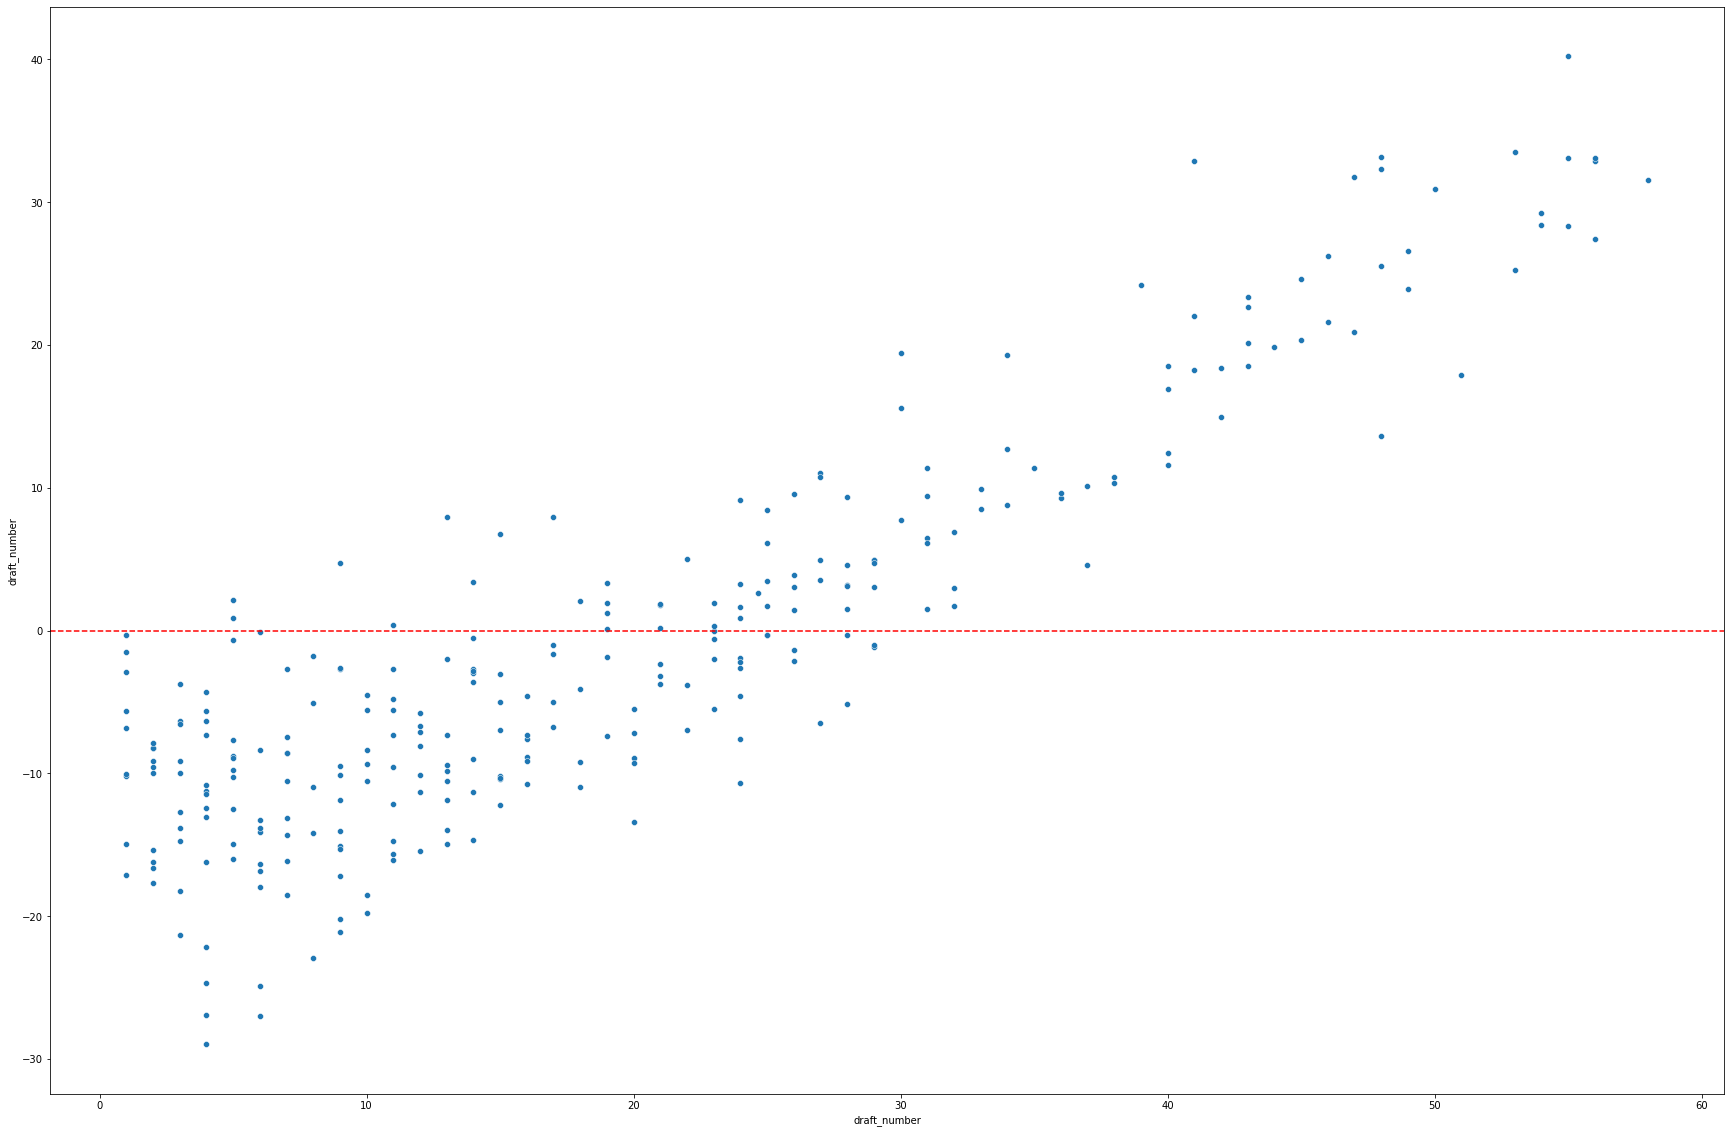

In [14]:
test_residuals = y_test - test_predictions
test_residuals
fig = plt.gcf()
fig.set_size_inches(30, 20)
# checking if using linear regression is fine, the data below should be distributed randomly
# if its not we should consider not using linear regression
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='--')

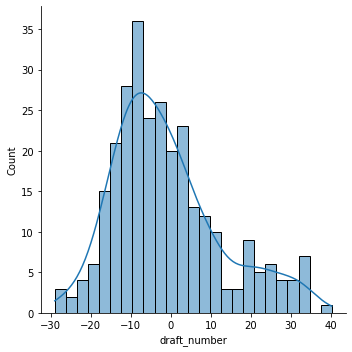

In [15]:
# check if distribution is normal
sns.displot(test_residuals, bins=25, kde=True)

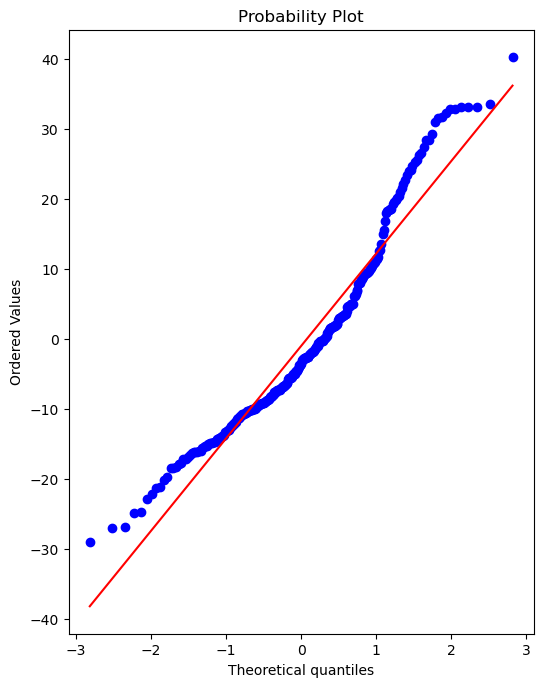

In [16]:
import scipy as sp

# create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8), dpi=100)
# probplot returns the raw values if needed
# want to see the plot, so we assign these values to
_ = sp.stats.probplot(test_residuals, plot=ax)

# The red line is 'normal distribution' 

In [17]:
# DEPLOYMENT OF THE MODEL
# this should be the same model that was adjusted on test set of data
final_model = model

# fit final model on a full data 
final_model.fit(X,y)

LinearRegression()

In [18]:
# checking the coefficients
# every coefficient is for another column in data

# (if coef ~ 0, there is no correlation)
final_model.coef_
# if I increase reb by one unit, i can expect decreasing draft_number by 0.8

array([ -0.76397925,  -0.79726274,  -3.14964821,   0.17930737,
         6.44525089, -20.43374214, -18.51806189,  39.88999193,
        54.64906465])

In [19]:
X.columns

Index(['pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct',
       'ts_pct', 'ast_pct'],
      dtype='object')

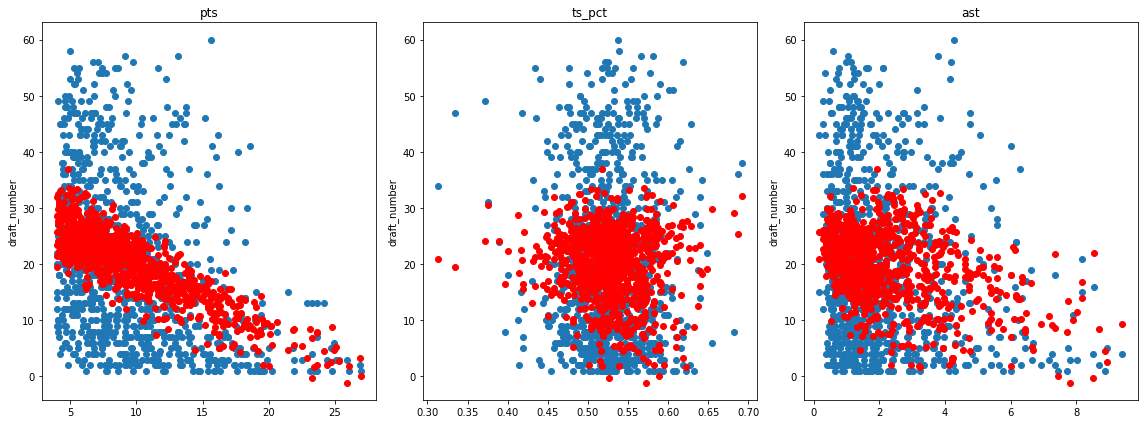

In [20]:
# showing on plot true values and values predicted by a model
y_hat = final_model.predict(X)

fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(drafted_players_grouped['pts'],drafted_players_grouped['draft_number'],'o')
axes[0].plot(drafted_players_grouped['pts'],y_hat,'o',color='red')
axes[0].set_ylabel('draft_number')
axes[0].set_title("pts")

axes[1].plot(drafted_players_grouped['ts_pct'],drafted_players_grouped['draft_number'],'o')
axes[1].plot(drafted_players_grouped['ts_pct'],y_hat,'o',color='red')
axes[1].set_title("ts_pct")
axes[1].set_ylabel('draft_number')

axes[2].plot(drafted_players_grouped['ast'],drafted_players_grouped['draft_number'],'o')
axes[2].plot(drafted_players_grouped['ast'],y_hat,'o',color='red')
axes[2].set_title("ast");
axes[2].set_ylabel('draft_number')
plt.tight_layout();

# red color are values predicted by a model
# we can see that the model is not precise. We should try different approach to get the answer for 
# our main question and compare results.

DEPLOYMENT OF A MODEL

In [21]:
# DEPLOING A MODEL
from joblib import dump, load
# now we are saving a model
dump(final_model, 'final_draft_prediction.joblib')

['final_draft_prediction.joblib']

In [22]:
# loading ready model 
loaded_model = load('final_draft_prediction.joblib')

# model coeficients:
loaded_model.coef_

array([ -0.76397925,  -0.79726274,  -3.14964821,   0.17930737,
         6.44525089, -20.43374214, -18.51806189,  39.88999193,
        54.64906465])

In [23]:
# Lets try to predict draft number for a player with stats like these:
# something around Lebron James career stats:
some_guy = [[27, 9, 7, 2.5, 0.08, 0.05, 0.3, 0.55, 0.3]]

In [24]:
loaded_model.predict(some_guy)
# we can see that prediction is not accurate, but we should have in mind Root mean squared error ~13.5.
# This is pretty big error for such a data set.

array([-1.93957778])

POLYNOMIAL REGRESSION

In [25]:
# Now we will try to use Polynomial Regression for this data
X_poly = drafted_players_grouped.drop(columns=['draft_number', 'age', 'gp', 'Unnamed: 0', 'player_height',
                                          'player_weight'], axis=1)
print(X_poly)
# label column
y_poly = drafted_players_grouped['draft_number']
print(y_poly)

from sklearn.preprocessing import PolynomialFeatures

# degree - it will create x^2 plot and include_bias - it will create columns of 1
# (the degree was changed to 1 due to smaller RMSE error - it will be shown below)
polynomial_converter = PolynomialFeatures(degree=1, include_bias=False)

                          pts       reb       ast  net_rating  oreb_pct  \
player_name                                                               
A.C. Green           5.780000  6.060000  0.860000   -1.880000  0.093000   
AJ Price             5.350000  1.333333  2.000000   -2.233333  0.017667   
Aaron Brooks         8.880000  1.550000  2.760000   -3.310000  0.022700   
Aaron Gordon        12.500000  6.271429  2.442857   -1.328571  0.057571   
Aaron Holiday        7.533333  1.666667  2.333333    3.000000  0.011000   
...                       ...       ...       ...         ...       ...   
Zarko Cabarkapa      4.466667  2.133333  0.566667   -6.333333  0.071000   
Zaza Pachulia        6.700000  5.743750  1.318750    0.350000  0.121500   
Zeljko Rebraca       5.560000  2.960000  0.360000   -2.760000  0.074400   
Zion Williamson     24.750000  6.750000  2.900000    3.600000  0.086500   
Zydrunas Ilgauskas  12.938462  7.338462  1.092308    2.107692  0.124538   

                    dreb

In [26]:
# we dont need to split (training, test data) it just yet, because it's not machine learning model, 
# it's feature converter
polynomial_converter.fit(X_poly)
poly_features = polynomial_converter.transform(X_poly)
poly_features.shape

(950, 9)

In [27]:
poly_features[0]

array([ 5.78  ,  6.06  ,  0.86  , -1.88  ,  0.093 ,  0.1864,  0.1274,
        0.4868,  0.054 ])

In [28]:
from sklearn.model_selection import train_test_split

# changing X to poly_features (features with more columns)
poly_X_train, poly_X_test, poly_y_train, poly_y_test = train_test_split(poly_features, y_poly, test_size=0.3, random_state=101)

In [29]:
from sklearn.linear_model import LinearRegression

poly_model = LinearRegression()
poly_model.fit(poly_X_train, poly_y_train)
poly_test_predictions = poly_model.predict(poly_X_test)
print(poly_model.coef_)

[ -0.48466969  -0.91858231  -3.93108591   0.2558023   19.4003507
 -24.68260642 -49.55086825  44.65299131  72.28200532]


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

MAE = mean_absolute_error(poly_y_test, poly_test_predictions)
print(MAE)
MSE = mean_squared_error(poly_y_test, poly_test_predictions)
print(MSE)
RMSE = np.sqrt(MSE)
print(RMSE)

10.721345780433678
182.83688771688057
13.521719111003621


PLOTTING THE RESULTS FOR DIFFERENT FUNCTION DEGREE

In [31]:
# creating a loop for polynomial regression to check how our reggresion model behaves on 
# different function degree

train_RMSE_error = []
test_RMSE_error = []

for d in range(1,10):
    poly_converter1 = PolynomialFeatures(degree = d, include_bias=False)
    poly_features1 = poly_converter1.fit_transform(X_poly)
    
    poly2_X_train, poly2_X_test, poly2_y_train, poly2_y_test = train_test_split(poly_features1, y_poly, test_size=0.3, random_state=101)
    
    poly2_model = LinearRegression()
    poly2_model.fit(poly2_X_train, poly2_y_train)
    
    poly2_train_pred = poly2_model.predict(poly2_X_train)
    poly2_test_pred = poly2_model.predict(poly2_X_test)
    
    poly2_train_rmse = np.sqrt(mean_squared_error(poly2_y_train, poly2_train_pred))
    poly2_test_rmse = np.sqrt(mean_squared_error(poly2_y_test, poly2_test_pred))
    
    train_RMSE_error.append(poly2_train_rmse)
    test_RMSE_error.append(poly2_test_rmse)

In [32]:
# it behaves naturally - when we increases degree of a function, the rmse gettin lower 
# (for higher degrees we got some anomaly due to huge overfitting)
train_RMSE_error

[12.796518757852553,
 12.304160929457035,
 10.393447414505344,
 0.02344194050104647,
 7.43703998195338e-07,
 3.869734629869138e-07,
 7.011780602170248e-07,
 3.5937087851488195e-06,
 0.0005760726423251775]

In [33]:
test_RMSE_error

[13.521719111003621,
 13.94547273595299,
 25.09863562183158,
 1374.6341478044503,
 2624.204519192357,
 9747.10797223317,
 33988.44762107127,
 96053.26332113896,
 768136.0853831888]

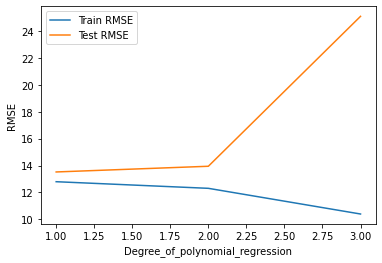

In [34]:
plt.plot(range(1, 4), train_RMSE_error[:3], label='Train RMSE')
plt.plot(range(1, 4), test_RMSE_error[:3], label='Test RMSE')
plt.xlabel('Degree_of_polynomial_regression')
plt.ylabel('RMSE')
plt.legend()

# based on both train_RMSE_error and test_RMSE_error - the model is overfitted and does not give 
# results that we expected. RMSE for trainig data is decreasing but RMSE for test data does not follow
# this trend.
# We can also say that the best performance is reached when the degree of the polynomial model is 1 or 2
# The next step would be to regularize data and check how our model would behave/change.